# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Hussein Aprianto
- **Email:** riantonaruto@gmail.com
- **ID Dicoding:** husato

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh variabel cuaca (misalnya temperatur, kelembaban, kecepatan angin) dan faktor waktu (jam, hari kerja vs. hari libur) terhadap tingkat permintaan sewa sepeda secara hourly selama tahun 2011–2012, dan apa rekomendasi operasional untuk mengoptimalkan distribusi armada selama jam-jam puncak?
- Apakah terdapat pola musiman dan dampak kondisi cuaca yang signifikan terhadap jumlah sewa sepeda harian selama tahun 2011–2012, dan bagaimana temuan tersebut dapat digunakan untuk merancang strategi promosi atau penawaran khusus guna meningkatkan penggunaan di periode dengan permintaan rendah?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

**Insight:**
- Ada dua dataframe yaitu day_df untuk penyewaan sepeda berdasarkan hari dan hour_df untuk penyewaan sepeda berdasarkan jam

### Assessing Data

**Melihat isi Dataset**

In [6]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mengecek Data Duplikat

In [10]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Mengecek Missing Value

In [12]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [13]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Memeriksa Parameter Statistik

In [14]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ditemukan duplikasi data
- Tidak ditemukan missing values
- Kolom dteday memiliki fomrat yang kurang tepat, yaitu string

### Cleaning Data

In [16]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Mengubah kolom "dteday" yang merupakan tanggal dari data penyewaan sepeda, dari string menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

**EDA untuk Dataset day.csv**

Memeriksa Parameter Statistik dari Frekuensi Penyewaan sepeda berdasarkan Musim

In [18]:
day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                                
         max   min         mean          std
season                                      
1       7836   431  2604.132597  1399.942119
2       8362   795  4992.331522  1695.977235
3       8714  1115  5644.303191  1459.800381
4       8555    22  4728.162921  1699.615261

Memeriksa Distribusi Permintaan Harian

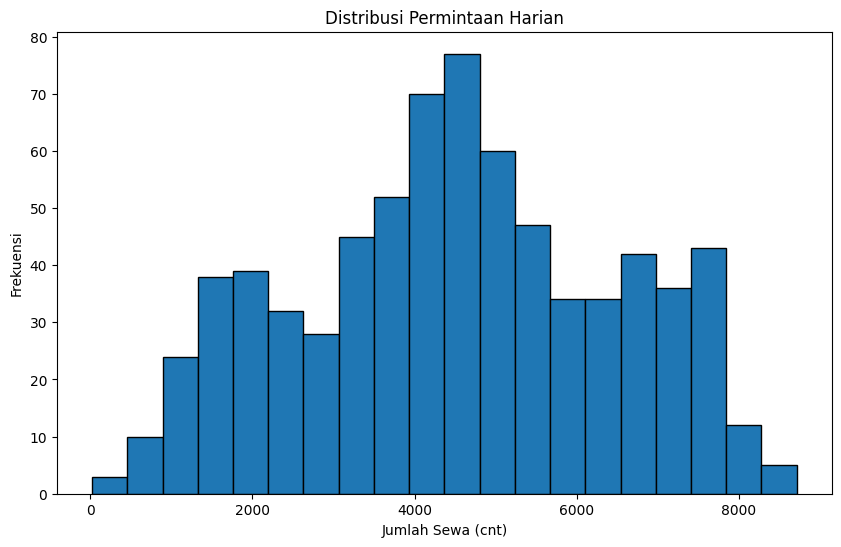

In [19]:
plt.figure(figsize=(10,6))
plt.hist(day_df['cnt'], bins=20, edgecolor='black')
plt.title('Distribusi Permintaan Harian')
plt.xlabel('Jumlah Sewa (cnt)')
plt.ylabel('Frekuensi')
plt.show()

Memeriksa Distribusi Variabel Cuaca

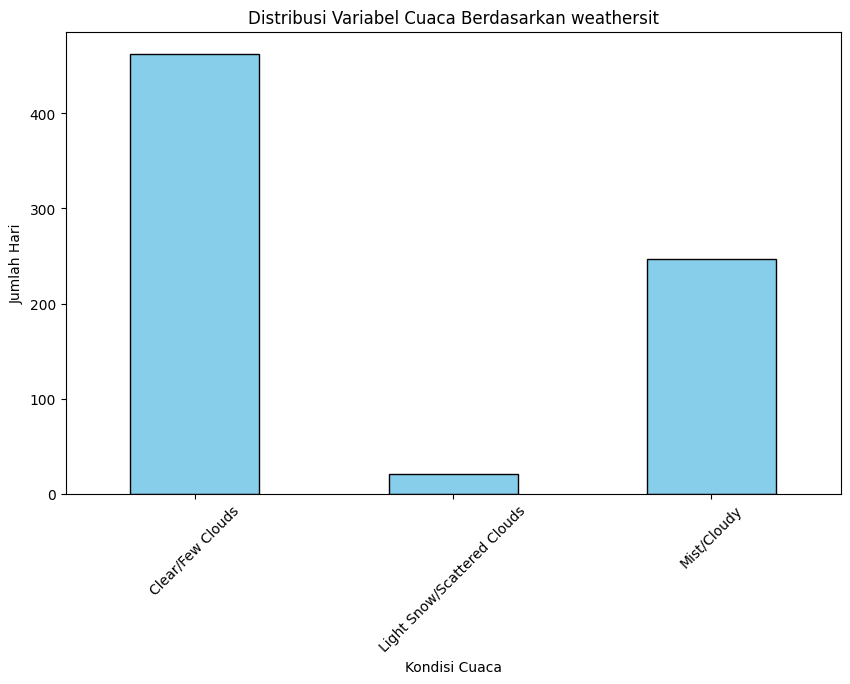

In [48]:
weather_mapping = {
    1: 'Clear/Few Clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Scattered Clouds',
    4: 'Heavy Rain/Snow+Fog'
}

# Menambahkan kolom deskripsi cuaca berdasarkan mapping di atas
day_df['weather_desc'] = day_df['weathersit'].map(weather_mapping)

# Menghitung frekuensi masing-masing kondisi cuaca
weather_counts = day_df['weather_desc'].value_counts().sort_index()

# Visualisasi dengan diagram batang
plt.figure(figsize=(10,6))
weather_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Variabel Cuaca Berdasarkan weathersit')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=45)
plt.show()

Memeriksa rata - rata jumlah sewa berdasarkan cuaca

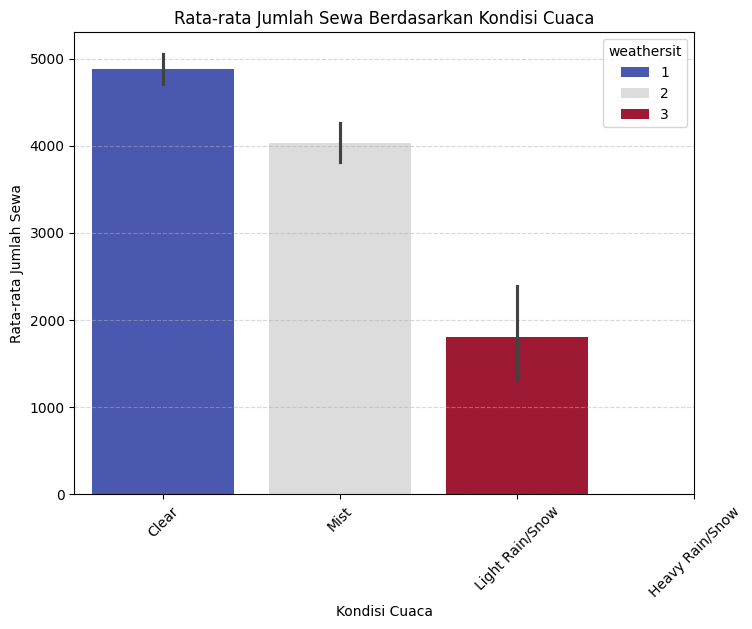

In [49]:
# Buat bar chart dengan rata-rata jumlah sewa berdasarkan cuaca
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=day_df, estimator=np.mean, palette='coolwarm', hue='weathersit')

# Menambahkan elemen visual
plt.title('Rata-rata Jumlah Sewa Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()

Memeriksa korelasi jumlah sewa harian dengan variabel cuaca

Menggunakan Correlation Matrix

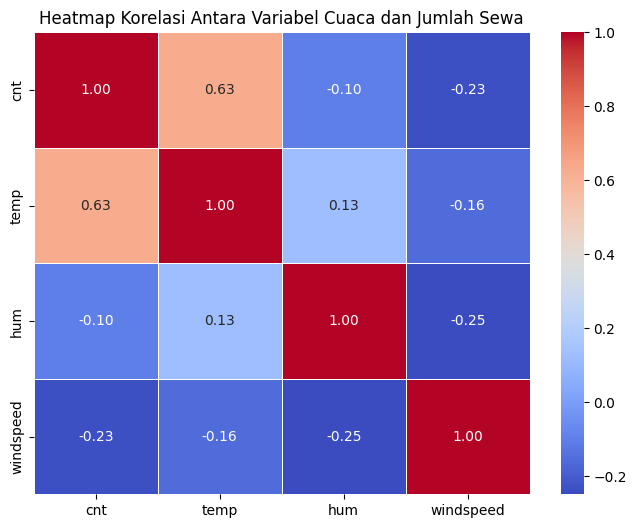

In [53]:
# Menghitung korelasi antar variabel
correlation_matrix = day_df[['cnt', 'temp', 'hum', 'windspeed']].corr()

# Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap Korelasi Antara Variabel Cuaca dan Jumlah Sewa')

# Menampilkan plot
plt.show()

Menggunakan scatter plot

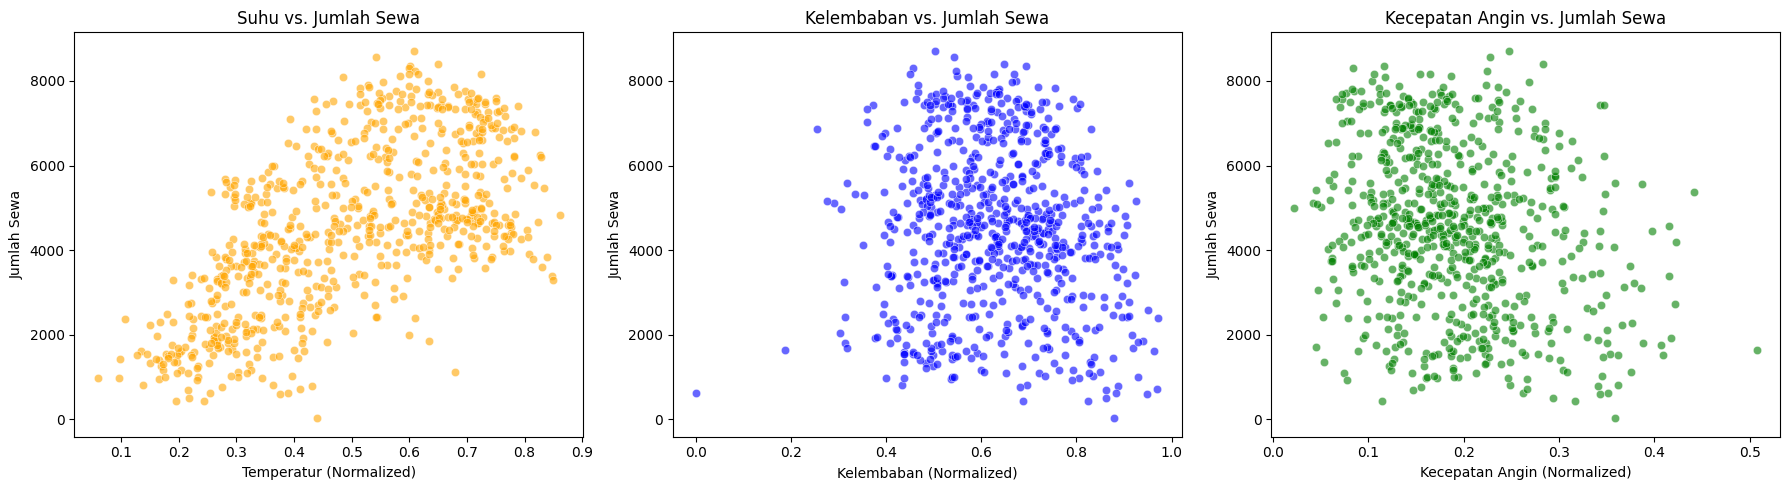

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot: Suhu vs. Jumlah Sewa
sns.scatterplot(ax=axes[0], x=day_df['temp'], y=day_df['cnt'], color='orange', alpha=0.6)
axes[0].set_title('Suhu vs. Jumlah Sewa')
axes[0].set_xlabel('Temperatur (Normalized)')
axes[0].set_ylabel('Jumlah Sewa')

# Scatter plot: Kelembaban vs. Jumlah Sewa
sns.scatterplot(ax=axes[1], x=day_df['hum'], y=day_df['cnt'], color='blue', alpha=0.6)
axes[1].set_title('Kelembaban vs. Jumlah Sewa')
axes[1].set_xlabel('Kelembaban (Normalized)')
axes[1].set_ylabel('Jumlah Sewa')

# Scatter plot: Kecepatan Angin vs. Jumlah Sewa
sns.scatterplot(ax=axes[2], x=day_df['windspeed'], y=day_df['cnt'], color='green', alpha=0.6)
axes[2].set_title('Kecepatan Angin vs. Jumlah Sewa')
axes[2].set_xlabel('Kecepatan Angin (Normalized)')
axes[2].set_ylabel('Jumlah Sewa')

# Menampilkan plot
plt.tight_layout()
plt.show()

Memeriksa Tren Jumlah Sewa Harian

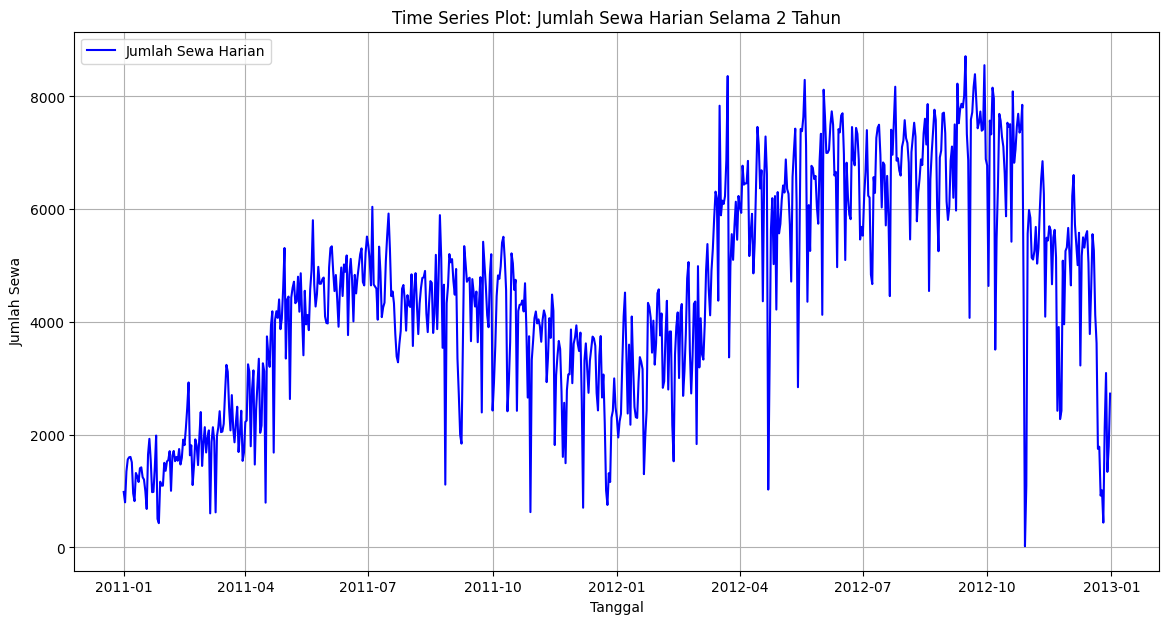

In [21]:
day_df.sort_values('dteday', inplace=True)

# Membuat plot time series
plt.figure(figsize=(14, 7))
plt.plot(day_df['dteday'], day_df['cnt'], label='Jumlah Sewa Harian', color='blue')
plt.title('Time Series Plot: Jumlah Sewa Harian Selama 2 Tahun')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sewa')
plt.legend()
plt.grid(True)
plt.show()

Memeriksa rata - rata permintaan sewa harian berdasarkan musim

season_label
Fall      5644.303191
Spring    2604.132597
Summer    4992.331522
Winter    4728.162921
Name: cnt, dtype: float64


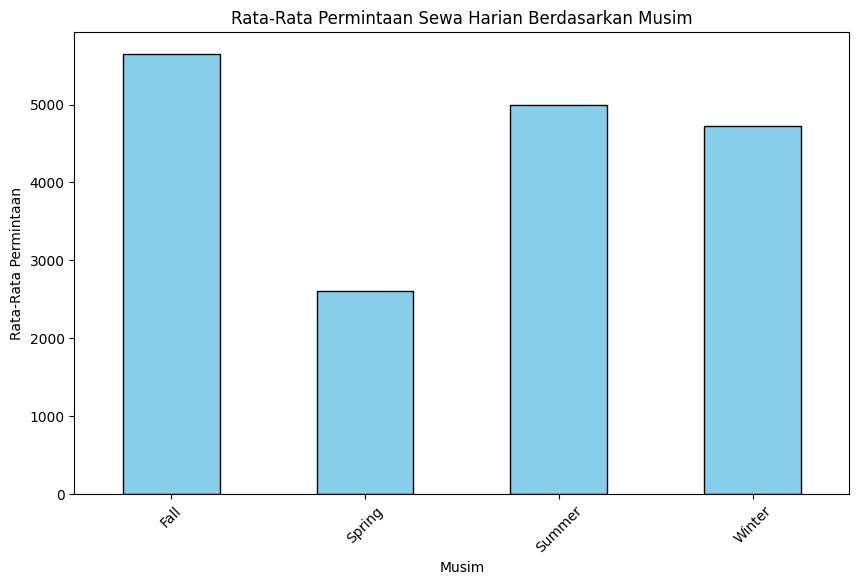

In [25]:
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Menambahkan kolom label season
day_df['season_label'] = day_df['season'].map(season_mapping)

# Mengelompokkan data berdasarkan season dan menghitung rata-rata permintaan (cnt)
season_avg = day_df.groupby('season_label')['cnt'].mean()

print(season_avg)

# Visualisasi menggunakan diagram batang
plt.figure(figsize=(10,6))
season_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Rata-Rata Permintaan Sewa Harian Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Permintaan')
plt.xticks(rotation=45)
plt.show()

Memeriksa rata - rata permintaan sewa harian berdasarkan weekday vs weekend/holiday

day_type
Weekday            4584.820000
Weekend/Holiday    4330.168831
Name: cnt, dtype: float64


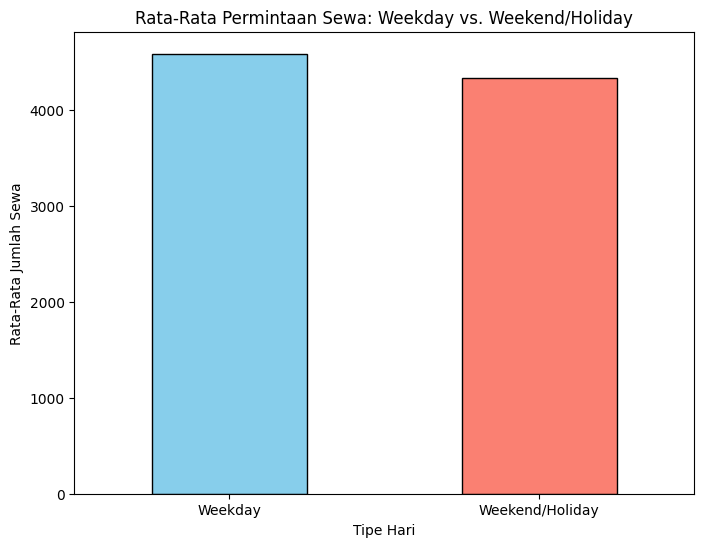

In [24]:
day_df['day_type'] = day_df['workingday'].map({1: 'Weekday', 0: 'Weekend/Holiday'})

# Mengelompokkan data berdasarkan day_type dan menghitung rata-rata permintaan
avg_rentals = day_df.groupby('day_type')['cnt'].mean()
print(avg_rentals)

# Visualisasi rata-rata permintaan menggunakan diagram batang
plt.figure(figsize=(8, 6))
avg_rentals.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Rata-Rata Permintaan Sewa: Weekday vs. Weekend/Holiday')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-Rata Jumlah Sewa')
plt.xticks(rotation=0)
plt.show()

Rata - rata permintaan sewa harian berdasarkan suhu ekstrem vs moderat

temp_condition
Extreme     4122.830601
Moderate    4886.912329
Name: cnt, dtype: float64


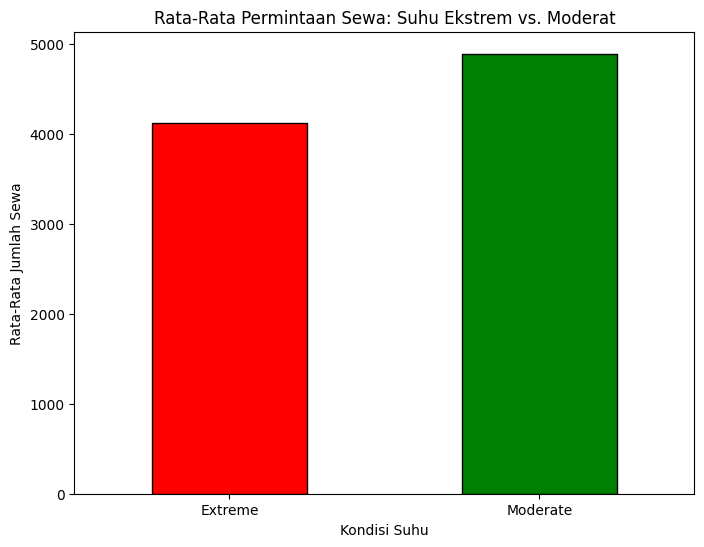

In [26]:
q1 = day_df['temp'].quantile(0.25)
q3 = day_df['temp'].quantile(0.75)

# Klasifikasikan hari berdasarkan kondisi suhu:
# - 'Extreme' untuk hari dengan suhu di bawah q1 atau di atas q3
# - 'Moderate' untuk hari di antara q1 dan q3
day_df['temp_condition'] = day_df['temp'].apply(lambda x: 'Extreme' if (x < q1 or x > q3) else 'Moderate')

# Hitung rata-rata jumlah sewa (cnt) untuk masing-masing kondisi suhu
avg_rentals = day_df.groupby('temp_condition')['cnt'].mean()
print(avg_rentals)

# Visualisasi perbandingan dengan diagram batang
plt.figure(figsize=(8,6))
avg_rentals.plot(kind='bar', color=['red', 'green'], edgecolor='black')
plt.title('Rata-Rata Permintaan Sewa: Suhu Ekstrem vs. Moderat')
plt.xlabel('Kondisi Suhu')
plt.ylabel('Rata-Rata Jumlah Sewa')
plt.xticks(rotation=0)
plt.show()

**EDA untuk dataset hour.csv**

Memeriksa parameter statistik dari permintaan sewa berdasarkan per jam

In [27]:
hour_df.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                            
    max min        mean         std
hr                                 
0   283   2   53.898072   42.307910
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
3    79   1   11.727403   13.239190
4    28   1    6.352941    4.143818
5    66   1   19.889819   13.200765
6   213   1   76.044138   55.084348
7   596   1  212.064649  161.441936
8   839   5  359.011004  235.189285
9   426  14  219.309491   93.703458
10  539   8  173.668501  102.205413
11  663  10  208.143054  127.495536
12  776   3  253.315934  145.081134
13  760  11  253.661180  148.107657
14  750  12  240.949246  147.271574
15  750   7  251.233196  144.632541
16  783  11  311.983562  148.682618
17  976  15  461.452055  232.656611
18  977  23  425.510989  224.639304
19  743  11  311.523352  161.050359
20  567  11  226.030220  119.670164
21  584   6  172.314560   89.788893
22  502   9  131.335165   69.937782
23  256   2   87.831044   50.846889

Memeriksa distribusi frekuensi sewa perjam terhadap variabel cuaca (Temperatur, Kelembapan dan Kecepatan Angin)

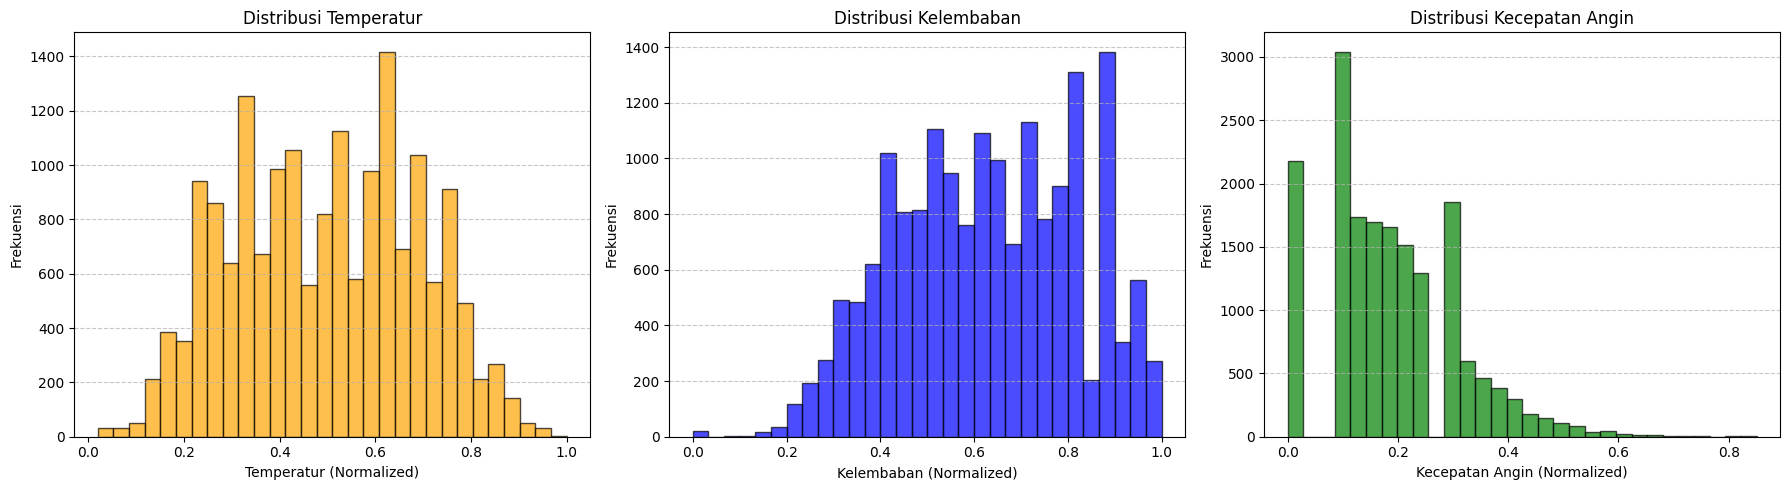

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram untuk distribusi temperatur
axes[0].hist(hour_df['temp'], bins=30, color='orange', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribusi Temperatur')
axes[0].set_xlabel('Temperatur (Normalized)')
axes[0].set_ylabel('Frekuensi')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histogram untuk distribusi kelembaban
axes[1].hist(hour_df['hum'], bins=30, color='blue', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribusi Kelembaban')
axes[1].set_xlabel('Kelembaban (Normalized)')
axes[1].set_ylabel('Frekuensi')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Histogram untuk distribusi kecepatan angin
axes[2].hist(hour_df['windspeed'], bins=30, color='green', edgecolor='black', alpha=0.7)
axes[2].set_title('Distribusi Kecepatan Angin')
axes[2].set_xlabel('Kecepatan Angin (Normalized)')
axes[2].set_ylabel('Frekuensi')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

Memeriksa Heatmap korelasi antara variabel cuaca dan jumlah sewa

Menggunakan correlation matrix

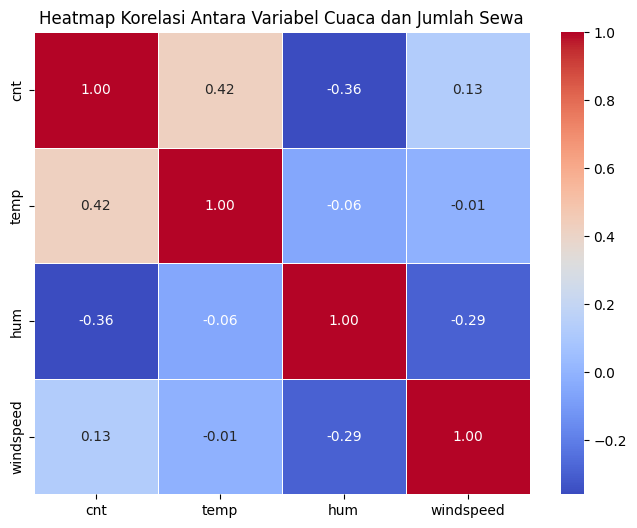

In [52]:
correlation_matrix = hour_df[['cnt', 'temp', 'hum', 'windspeed']].corr(method="spearman")

# Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap Korelasi Antara Variabel Cuaca dan Jumlah Sewa')

# Menampilkan plot
plt.show()

Menggunakan scatter plot

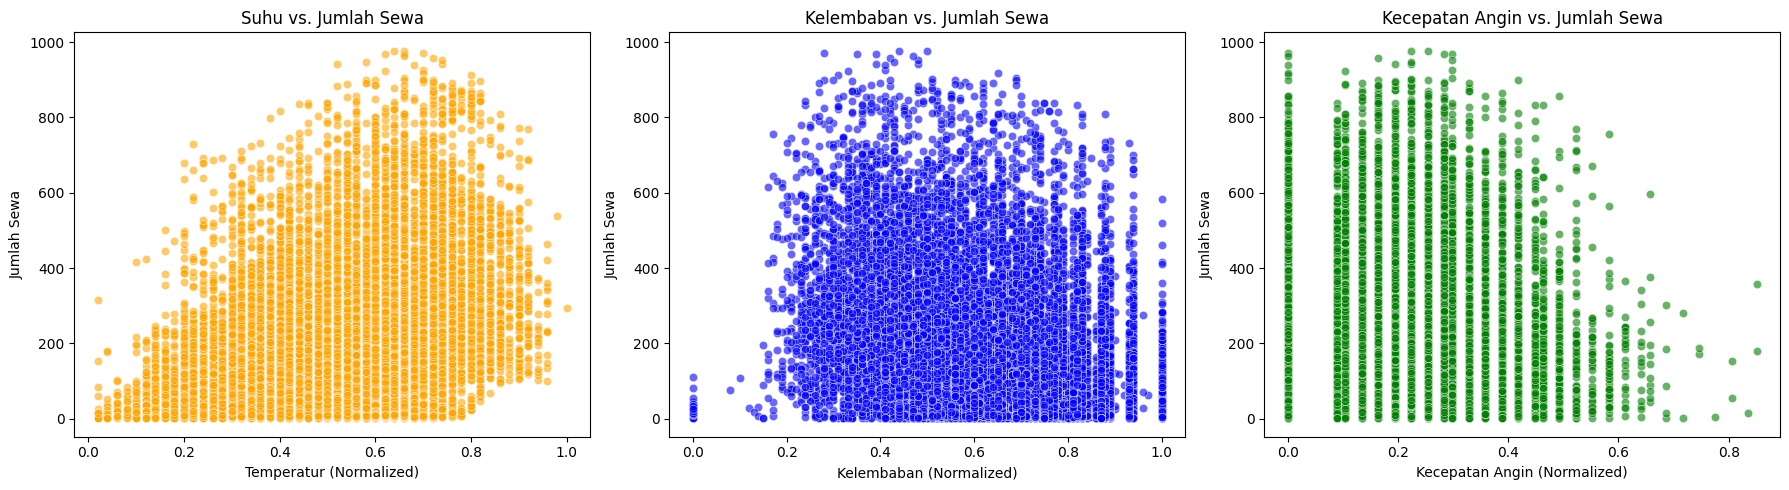

In [30]:
# Membuat subplot dengan 3 scatter plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot: Suhu vs. Jumlah Sewa
sns.scatterplot(ax=axes[0], x=hour_df['temp'], y=hour_df['cnt'], color='orange', alpha=0.6)
axes[0].set_title('Suhu vs. Jumlah Sewa')
axes[0].set_xlabel('Temperatur (Normalized)')
axes[0].set_ylabel('Jumlah Sewa')

# Scatter plot: Kelembaban vs. Jumlah Sewa
sns.scatterplot(ax=axes[1], x=hour_df['hum'], y=hour_df['cnt'], color='blue', alpha=0.6)
axes[1].set_title('Kelembaban vs. Jumlah Sewa')
axes[1].set_xlabel('Kelembaban (Normalized)')
axes[1].set_ylabel('Jumlah Sewa')

# Scatter plot: Kecepatan Angin vs. Jumlah Sewa
sns.scatterplot(ax=axes[2], x=hour_df['windspeed'], y=hour_df['cnt'], color='green', alpha=0.6)
axes[2].set_title('Kecepatan Angin vs. Jumlah Sewa')
axes[2].set_xlabel('Kecepatan Angin (Normalized)')
axes[2].set_ylabel('Jumlah Sewa')

# Menampilkan plot
plt.tight_layout()
plt.show()

Memeriksa rata - rata jumlah permintaan berdasarkan hari kerja vs akhir pekan

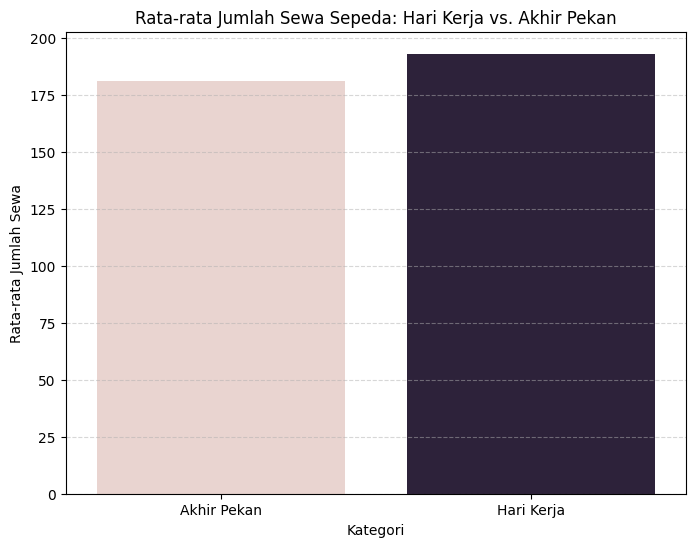

In [58]:
df_grouped = hour_df.groupby('workingday')['cnt'].mean().reset_index()

# Membuat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=df_grouped['workingday'], y=df_grouped['cnt'], hue=df_grouped['cnt'], legend=False)

# Menambahkan elemen visual
plt.xticks([0, 1], ['Akhir Pekan', 'Hari Kerja'])
plt.title('Rata-rata Jumlah Sewa Sepeda: Hari Kerja vs. Akhir Pekan')
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()

Memeriksa tren rata - rata jumlah sewa per-hari berdasarkan jam

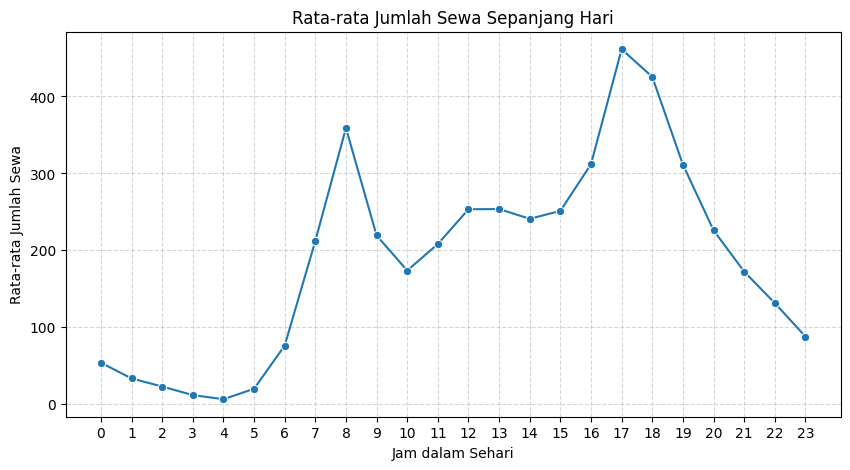

In [33]:
# Menghitung rata-rata jumlah sewa per jam
hourly_avg = hour_df.groupby('hr')['cnt'].mean().reset_index()

# Membuat time series plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_avg['hr'], y=hourly_avg['cnt'], marker='o', linestyle='-')

# Menambahkan elemen visual
plt.xticks(range(0, 24))
plt.title('Rata-rata Jumlah Sewa Sepanjang Hari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.grid(True, linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()

Memeriksa tren rata - rata jumlah sewa per-hari di hari kerja vs weekend/holiday berdasarkan jam

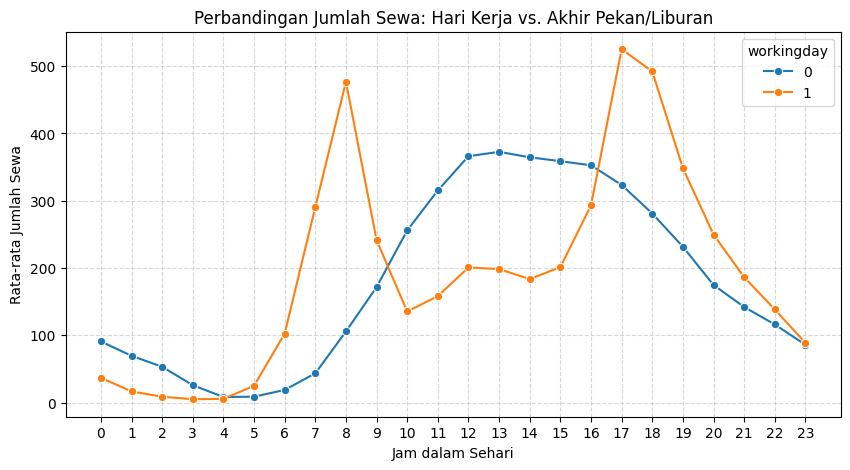

In [35]:
hourly_workingday = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()

# Membuat plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_workingday, x='hr', y='cnt', hue='workingday', marker='o', legend="auto")

# Menambahkan elemen visual
plt.xticks(range(0, 24))
plt.title('Perbandingan Jumlah Sewa: Hari Kerja vs. Akhir Pekan/Liburan')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Sewa')

plt.grid(True, linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()

Memeriksa rata - rata jam untuk jam - jam tertentu

In [36]:
# Menentukan rentang jam pagi (7-9) dan sore (17-19)
morning_hours = hour_df[hour_df['hr'].between(7, 9)]
evening_hours = hour_df[hour_df['hr'].between(17, 19)]

# Menghitung rata-rata jumlah sewa per jam
avg_morning_rentals = morning_hours['cnt'].mean()
avg_evening_rentals = evening_hours['cnt'].mean()
avg_other_rentals_1 = hour_df[~hour_df['hr'].between(7, 9)]['cnt'].mean()
avg_other_rentals_2 = hour_df[~hour_df['hr'].between(17, 19)]['cnt'].mean()
avg_other_rentals = (avg_other_rentals_1 + avg_other_rentals_2)/2

# Menampilkan hasil
print(f"Rata-rata jumlah sewa (07:00 - 09:00): {avg_morning_rentals:.2f}")
print(f"Rata-rata jumlah sewa (17:00 - 19:00): {avg_evening_rentals:.2f}")
print(f"Rata-rata jumlah sewa (Jam lainnya)  : {avg_other_rentals:.2f}")

Rata-rata jumlah sewa (07:00 - 09:00): 263.46
Rata-rata jumlah sewa (17:00 - 19:00): 399.55
Rata-rata jumlah sewa (Jam lainnya)  : 169.04


memeriksa fluktuasi permintaan sepanjang hari

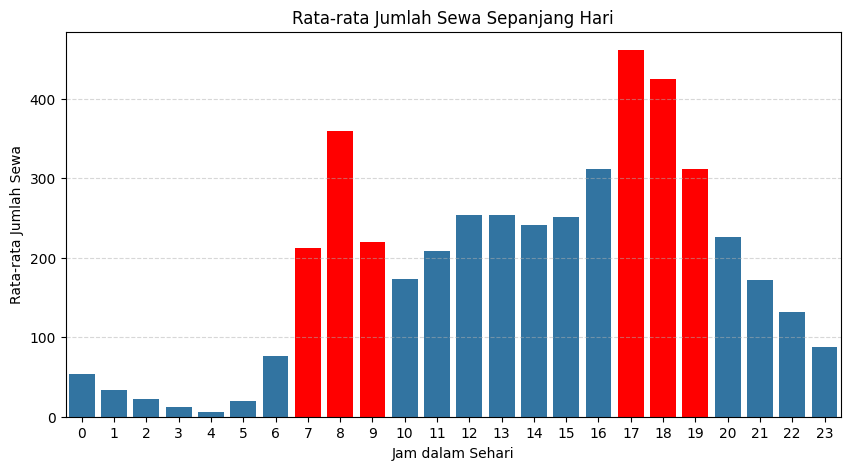

In [37]:
# Menghitung rata-rata jumlah sewa per jam
hourly_avg = hour_df.groupby('hr')['cnt'].mean().reset_index()

# Membuat bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_avg['hr'], y=hourly_avg['cnt'])

# Menandai jam 7-9 dan 17 - 19 dengan warna berbeda
for bar, hr in zip(plt.gca().containers[0], hourly_avg['hr']):
    if 7 <= hr <= 9:
        bar.set_facecolor('red')
    if 17 <= hr <= 19:
        bar.set_facecolor('red')

# Menambahkan elemen visual
plt.xticks(range(0, 24))
plt.title('Rata-rata Jumlah Sewa Sepanjang Hari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()

memeriksa rata - rata jumlah sewa untuk jam - jam tertentu berdasarkan Hari Kerja vs Akhir Pekan / Liburan

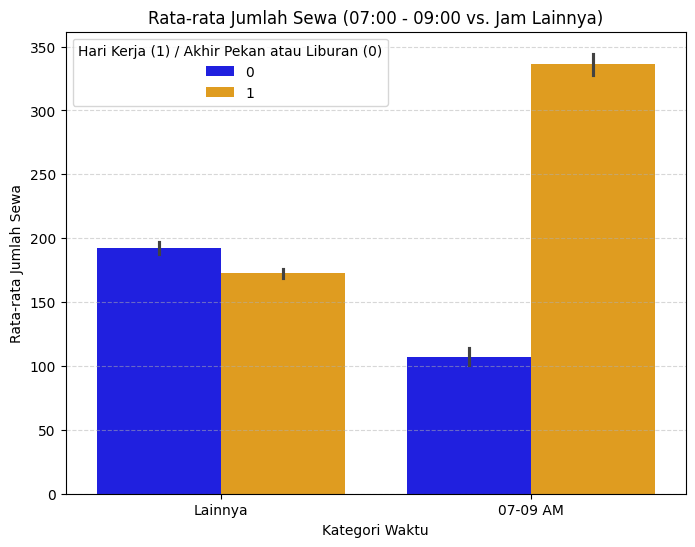

In [41]:
hour_df['morning'] = hour_df['hr'].apply(lambda x: '07-09 AM' if 7 <= x <= 9 else 'Lainnya')

plt.figure(figsize=(8, 6))
sns.barplot(x='morning', y='cnt', hue='workingday', data=hour_df, estimator=np.mean, palette=['blue', 'orange'])

plt.title('Rata-rata Jumlah Sewa (07:00 - 09:00 vs. Jam Lainnya)')
plt.xlabel('Kategori Waktu')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.legend(title='Hari Kerja (1) / Akhir Pekan atau Liburan (0)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

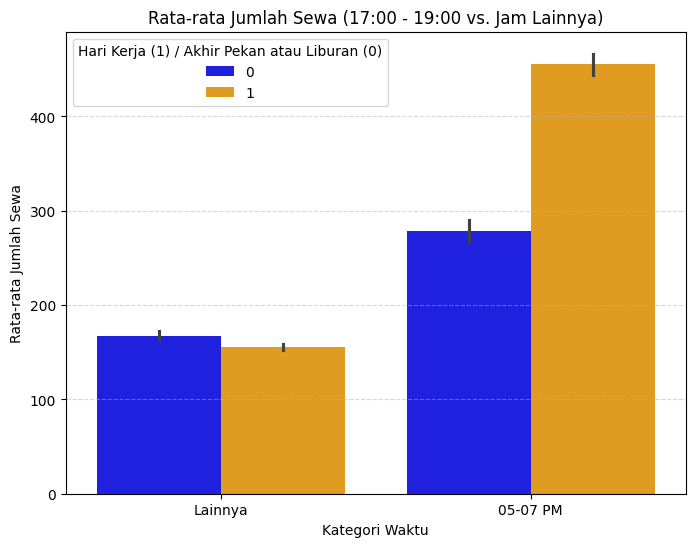

In [42]:
hour_df['morning'] = hour_df['hr'].apply(lambda x: '05-07 PM' if 17 <= x <= 19 else 'Lainnya')

plt.figure(figsize=(8, 6))
sns.barplot(x='morning', y='cnt', hue='workingday', data=hour_df, estimator=np.mean, palette=['blue', 'orange'])

plt.title('Rata-rata Jumlah Sewa (17:00 - 19:00 vs. Jam Lainnya)')
plt.xlabel('Kategori Waktu')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.legend(title='Hari Kerja (1) / Akhir Pekan atau Liburan (0)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

**Insight:**
- tidak ada data persewaan di cuaca (Hujan deras, butiran es, hujan petir, kabut, salju)
- data persewaan paling bajak disaat cuaca cerah/sedikit berawan dan paling sedikit saat salju ringan/sedikit hujan
- musim dengan rata - rata permintaan sewa harian paling sedikit adalah musim semi
- rata - rata permintaan sewa di hari biasa maupun libur/akhir pekan tidak jauh berbeda
- rata - rata permintaan sewa saat suhu ekstrem lebih sedikit dibandingkan suhu sedang
- terdapat korelasi tinggi antara peminjaman dengan varabel cuaca terutama temperatur dan kelembapan
- frekuensi data peminjaman dengan suhu sedang, kelembapan tinggi, dan kecepatan angin kecil memiliki frekuensi paling banyak
- rata rata jumlah sewa sepeda antara hari kerja dan akhir pekan tidak terlalu jauh
- tren rata-rata jumlah sewa untuk hari kerja menunujukan ada beberapa jam yang mengalami lonjakan frekuensi



## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Bagaimana pengaruh variabel cuaca (misalnya temperatur, kelembaban, kecepatan angin) dan faktor waktu (jam, hari kerja vs. hari libur) terhadap tingkat permintaan sewa sepeda secara hourly selama tahun 2011–2012, dan apa rekomendasi operasional untuk mengoptimalkan distribusi armada selama jam-jam puncak?

Pengaruh Variabel Cuaca terhadap tingkat permintaan sewa

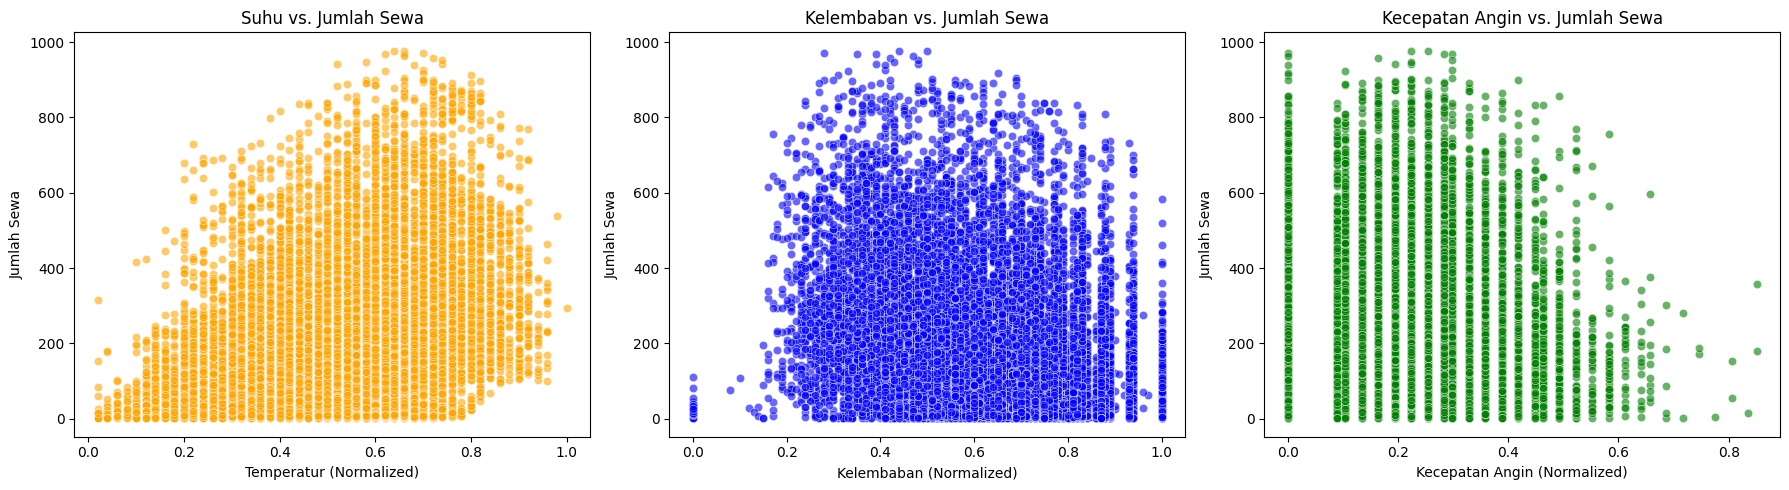

In [59]:
# Membuat subplot dengan 3 scatter plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot: Suhu vs. Jumlah Sewa
sns.scatterplot(ax=axes[0], x=hour_df['temp'], y=hour_df['cnt'], color='orange', alpha=0.6)
axes[0].set_title('Suhu vs. Jumlah Sewa')
axes[0].set_xlabel('Temperatur (Normalized)')
axes[0].set_ylabel('Jumlah Sewa')

# Scatter plot: Kelembaban vs. Jumlah Sewa
sns.scatterplot(ax=axes[1], x=hour_df['hum'], y=hour_df['cnt'], color='blue', alpha=0.6)
axes[1].set_title('Kelembaban vs. Jumlah Sewa')
axes[1].set_xlabel('Kelembaban (Normalized)')
axes[1].set_ylabel('Jumlah Sewa')

# Scatter plot: Kecepatan Angin vs. Jumlah Sewa
sns.scatterplot(ax=axes[2], x=hour_df['windspeed'], y=hour_df['cnt'], color='green', alpha=0.6)
axes[2].set_title('Kecepatan Angin vs. Jumlah Sewa')
axes[2].set_xlabel('Kecepatan Angin (Normalized)')
axes[2].set_ylabel('Jumlah Sewa')

# Menampilkan plot
plt.tight_layout()
plt.show()

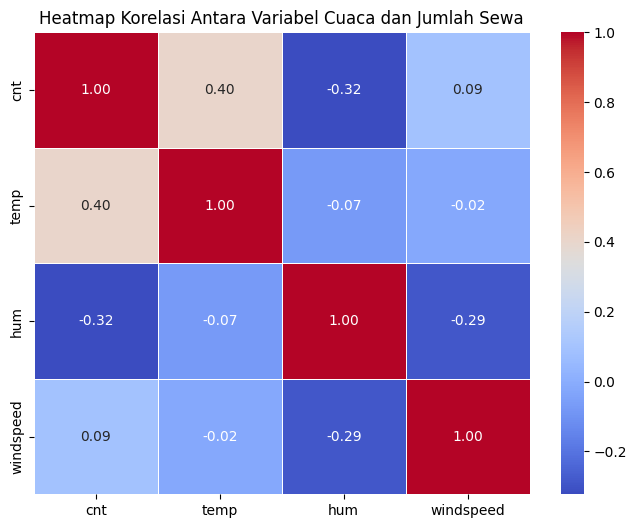

In [69]:
correlation_matrix = hour_df[['cnt', 'temp', 'hum', 'windspeed']].corr()

# Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap Korelasi Antara Variabel Cuaca dan Jumlah Sewa')

# Menampilkan plot
plt.show()

Pengaruh Faktor Waktu terhadap tingkat permintaan sewa

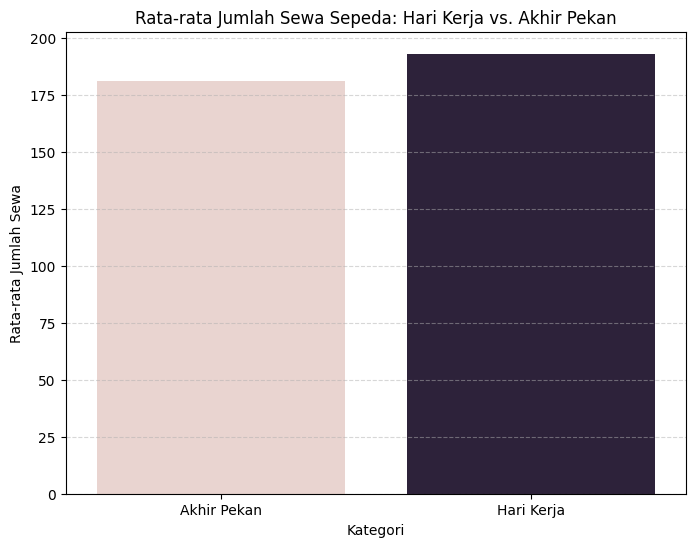

In [60]:
df_grouped = hour_df.groupby('workingday')['cnt'].mean().reset_index()

# Membuat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=df_grouped['workingday'], y=df_grouped['cnt'], hue=df_grouped['cnt'], legend=False)

# Menambahkan elemen visual
plt.xticks([0, 1], ['Akhir Pekan', 'Hari Kerja'])
plt.title('Rata-rata Jumlah Sewa Sepeda: Hari Kerja vs. Akhir Pekan')
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()

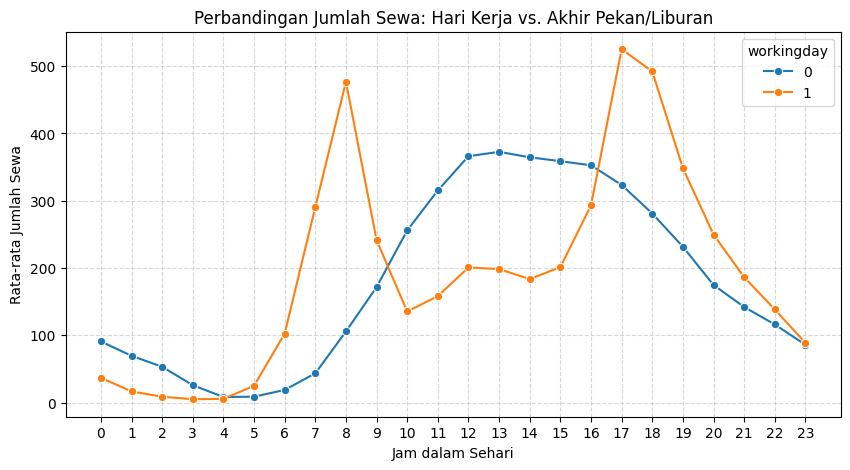

In [61]:
hourly_workingday = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()

# Membuat plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_workingday, x='hr', y='cnt', hue='workingday', marker='o', legend="auto")

# Menambahkan elemen visual
plt.xticks(range(0, 24))
plt.title('Perbandingan Jumlah Sewa: Hari Kerja vs. Akhir Pekan/Liburan')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Sewa')

plt.grid(True, linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()

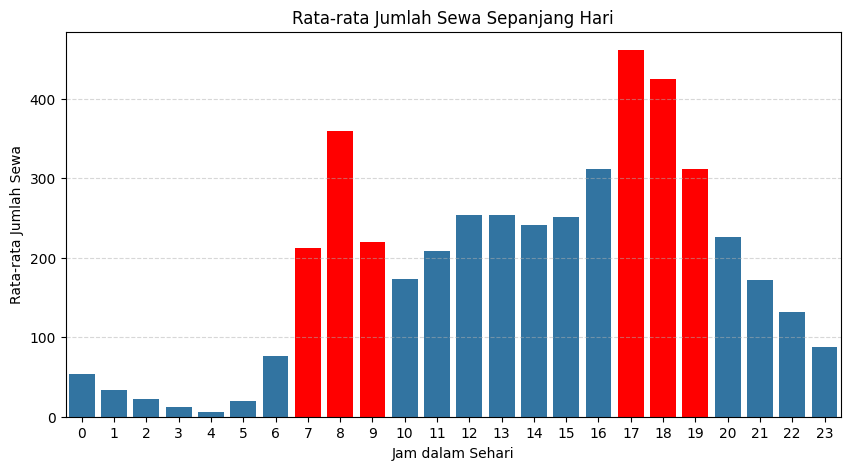

In [70]:
# Menghitung rata-rata jumlah sewa per jam
hourly_avg = hour_df.groupby('hr')['cnt'].mean().reset_index()

# Membuat bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_avg['hr'], y=hourly_avg['cnt'])

# Menandai jam 7-9 dan 17 - 19 dengan warna berbeda
for bar, hr in zip(plt.gca().containers[0], hourly_avg['hr']):
    if 7 <= hr <= 9:
        bar.set_facecolor('red')
    if 17 <= hr <= 19:
        bar.set_facecolor('red')

# Menambahkan elemen visual
plt.xticks(range(0, 24))
plt.title('Rata-rata Jumlah Sewa Sepanjang Hari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()

### Pertanyaan 2:

- Apakah terdapat pola musiman dan dampak kondisi cuaca yang signifikan terhadap jumlah sewa sepeda harian selama tahun 2011–2012, dan bagaimana temuan tersebut dapat digunakan untuk merancang strategi promosi atau penawaran khusus guna meningkatkan penggunaan di periode dengan permintaan rendah?

pola musiman terhadap jumlah sewa

season_label
Fall      5644.303191
Spring    2604.132597
Summer    4992.331522
Winter    4728.162921
Name: cnt, dtype: float64


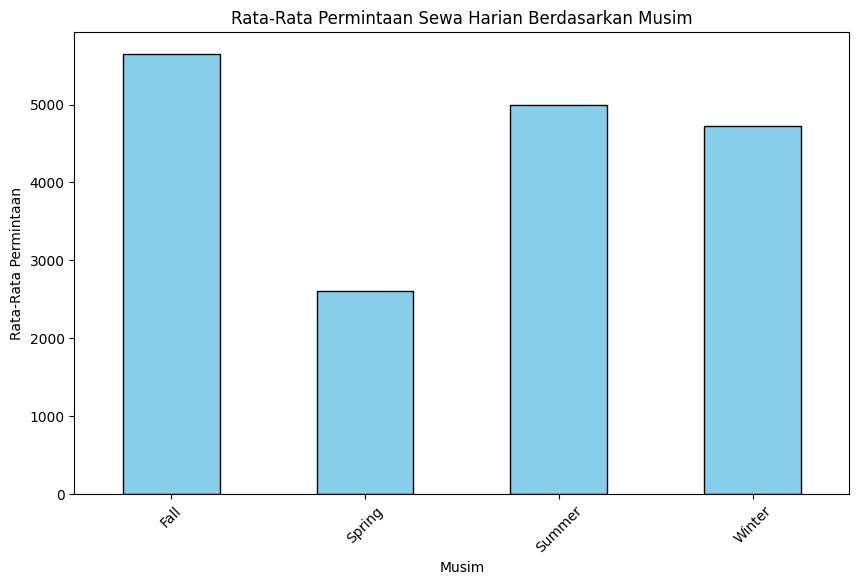

In [65]:
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Menambahkan kolom label season
day_df['season_label'] = day_df['season'].map(season_mapping)

# Mengelompokkan data berdasarkan season dan menghitung rata-rata permintaan (cnt)
season_avg = day_df.groupby('season_label')['cnt'].mean()

print(season_avg)

# Visualisasi menggunakan diagram batang
plt.figure(figsize=(10,6))
season_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Rata-Rata Permintaan Sewa Harian Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Permintaan')
plt.xticks(rotation=45)
plt.show()

dampak kondisi cuaca terhadap jumlah sewa

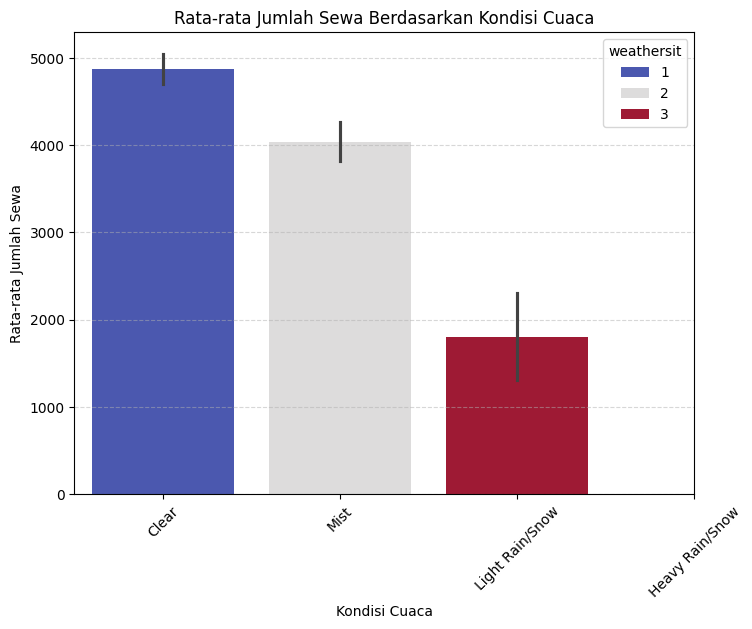

In [64]:
# Buat bar chart dengan rata-rata jumlah sewa berdasarkan cuaca
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=day_df, estimator=np.mean, palette='coolwarm', hue='weathersit')

# Menambahkan elemen visual
plt.title('Rata-rata Jumlah Sewa Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()


**Insight:**
- Jumlah sewa perjam sangat terpengaruh oleh variabel cuaca, dimana pada saat suhu tinggi maupun rendah frekuensi menurun, untuk kelembapan semakin sedang frekuensi sewa meningkat, dan untuk kecepatan angin semakin kecil kecepatan maka frekuensi sewa semakin meningkat
- Faktor waktu untuk hari kerja atau akhir pekan atau liburan tidak terlalu mempengaruhi jumlah sewa, namun terjadi lonjakan jumlah sewa untuk jam - jam tertentu di hari kerja terutama pada jam 07.00 - 09.00 dan 17.00 - 19.00
- terdapat pola musiman yang mempengaruhi rata - rata jumlah permintaan sewa menjadi sedikit yang terjadi disaat musim semi
- dampak kondisi cuaca sangat berpengaruh terhadap rata - rata jumlah permintaan sewa dengan cuaca cerah paling tinggi dan saat hujan deras/salju menjadi tidak ada sama sekali

## Analisis Lanjutan (Opsional)

Melakukan segmentasi terhadap jam - jam puncak

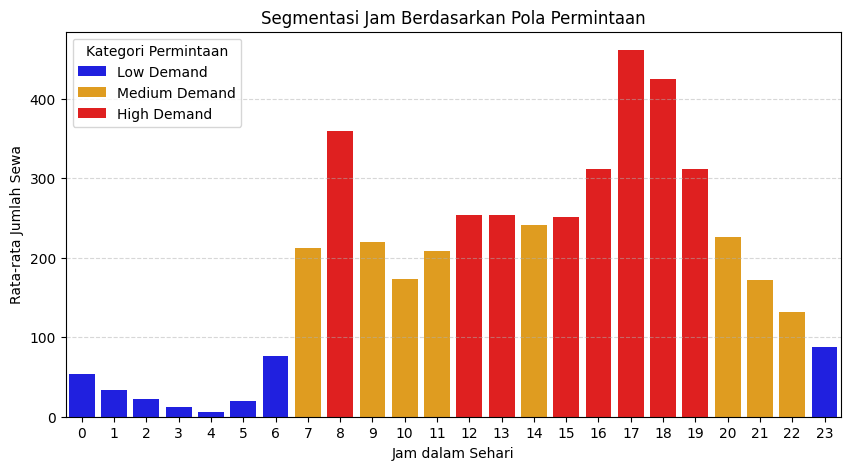

In [82]:
# Menghitung rata-rata jumlah sewa per jam
hourly_avg = hour_df.groupby('hr')['cnt'].mean().reset_index()

# Menentukan segmentasi berdasarkan persentil distribusi
low_demand = hourly_avg['cnt'].quantile(0.33)  # 33% terbawah
high_demand = hourly_avg['cnt'].quantile(0.66)  # 66% teratas

# Fungsi untuk memberi label kategori
def segment_hour(hour, cnt):
    if cnt <= low_demand:
        return 'Low Demand'  # Jam sepi
    elif cnt <= high_demand:
        return 'Medium Demand'  # Jam normal
    else:
        return 'High Demand'  # Jam sibuk

# Menambahkan kategori ke DataFrame
hourly_avg['demand_category'] = hourly_avg.apply(lambda row: segment_hour(row['hr'], row['cnt']), axis=1)

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_avg['hr'], y=hourly_avg['cnt'], hue=hourly_avg['demand_category'], palette={'Low Demand': 'blue', 'Medium Demand': 'orange', 'High Demand': 'red'})

# Menambahkan elemen visual
plt.xticks(range(0, 24))
plt.title('Segmentasi Jam Berdasarkan Pola Permintaan')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.legend(title="Kategori Permintaan")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()

**Insight**
- Dengan melakukan segmentasi terhadap setiap jam yang mana membagi setiap jam menjadi tiga bagian berdasarkan rata - rata jumlah sewa pada jam, tersebut, kita mendapatkan klustering jam - jam berdasarkan frekuensinya menjadi tiga, frekuensi tinggi (High Demand), frekuensi rendah (Low Demand) dan frekuensi sedang (Medium demand)

## Conclusion

1. **Pertanyaan 1**

- Pertanyaan : "Bagaimana pengaruh variabel cuaca (misalnya temperatur, kelembaban, kecepatan angin) dan faktor waktu (jam, hari kerja vs. hari libur) terhadap tingkat permintaan sewa sepeda secara hourly selama tahun 2011–2012, dan apa rekomendasi operasional untuk mengoptimalkan distribusi armada selama jam-jam puncak?"

- Konklusi : Variabel cuaca memilik pengaruh yang variatif dimana untuk temperatur, tingkat permintaan paling tinggi disaat temperatur cenderung hangat ke panas. untuk kelembapan, tingkat permintaan paling tinggi disaat kelembapan cenderung lembap ke kering. Dan untuk kecepatan angin, semakin pelan kecepatan angin semakin tinggi tingkat permintaan sewa sepeda. Untuk Faktor waktu tidak terdapat perbedaan tingkat permintaan sewa sepeda yang signifikan terhadap hari kerja maupun hari libur/akhir pekan, akan tetapi untuk hari kerja terdapat lonjakan permintaan sewa sepeda untuk jam - jam tertentu (07.00 - 09.00 dan 17.00 - 19.00) yang diasumsikan dikarenakan jam berangkat kerja dan jam pulang kerja, dengan melakukan clustering terhadap jam - jam kita dapat mengoptimalkan distribusi armada sepeda terhadap tingkat permintaan sewa nya (Low Demand, Medium Demand dan High Demand)

2. **Pertanyaan 2**
- Pertanyaan : Apakah terdapat pola musiman dan dampak kondisi cuaca yang signifikan terhadap jumlah sewa sepeda harian selama tahun 2011–2012, dan bagaimana temuan tersebut dapat digunakan untuk merancang strategi promosi atau penawaran khusus guna meningkatkan penggunaan di periode dengan permintaan rendah?

- Konklusi : Pola musiman memiliki dampak terhadap permintaan sewa sepeda yang membuat permintaan paling sedikit terjadi disaat musim semi dan paling tinggi disaat musim gugur, Kondisi cuaca juga sangar berpengaruh terhadap permintaan sewa sepeda dimana disaat cuaca cerah/berawan permintaan meningkat dan disaat cuaca hujan deras/salju tidak terdapat sama sekali data permintaan sewa. Temuan ini dapat digunakan untuk merancang promosi atau penawaran khusus guna meningkatkan penggunaan dengan memberi sarung tangan gratis di saat cuaca bersalju atau meningkatkan promosi disaat periode musim semi.